<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/SeamCarving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 52/52 [02:07<00:00,  2.45s/it]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

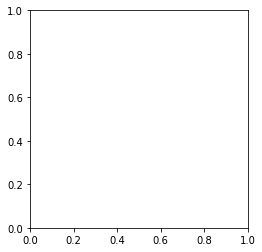

In [ ]:
import cv2
import numpy as np
from numpy import asarray
from tqdm import trange
import matplotlib.pyplot as plt
img=cv2.imread('/content/stt-vui-ve-bien.jpg7_.jpg',0)
def ComputeImageGradient(img):
    # Buoc 2: tinh dao ham theo truc x
    dx = img[:,1:].astype(np.float) - img[:,:-1].astype(np.float)
    # Buoc 3: tinh dao ham theo truc y
    dy = img[1:,:].astype(np.float) - img[:-1,:].astype(np.float)
    # Buoc 4: tinh image gradient
    G = np.sqrt(dx[:-1,:]**2 + dy[:,:-1]**2)
    return G
D=20
G=ComputeImageGradient(img)
G = G.astype(np.uint8)
img_origi = img.copy()
# BUOC 6: seam carving
def minimum_seam(img):
    G = ComputeImageGradient(img)
    r,c=G.shape
    #Gan ma tran G
    M=G.copy()
    F=np.zeros((M.shape[0],M.shape[1]))
    for i in range(1,r):
        for j in range(0,c):
            if j==0:
                idx = np.argmin(M[i - 1, j:j + 2])
                F[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                F[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]
            M[i,j]+=min_energy
    return M,F
def carve_column(img):
    M, backtrack = minimum_seam(img)
    r, c = M.shape
    mask = np.ones((r, c), dtype=np.bool)
    j = int(np.argmin(M[-1]))
    for i in reversed(range(r)):
        j=int(j)
        # Mark the pixels for deletion
        mask[i,j] = False
        j = backtrack[i,j]
    # Since the image has 3 channels, we convert our
    # mask to 3D
    # Delete all the pixels marked False in the mask,
    # and resize it to the new image dimensions
    img = np.delete(np.delete(img, -1, 0), -1, 1)
    r_new, c_new = img.shape
    img = img[mask].reshape((r_new, c_new - 1))
    return img
def crop_c(img, scale_c):
    r ,c = img.shape
    new_c = int(scale_c * c)
    for i in trange(c - new_c): # use range if you don't want to use tqdm
        img = carve_column(img)

    return img

# Buoc 5: hien thi anh de kiem tra xe doc dung ko
# Hien thi anh gradient
scale_c=0.95
img_seam=crop_c(img,scale_c)
plt.imshow('Anh goc', img)
plt.imshow('Anh seam carving',img_seam)
cv2.waitKey(0)
cv2.destroyAllWindows()

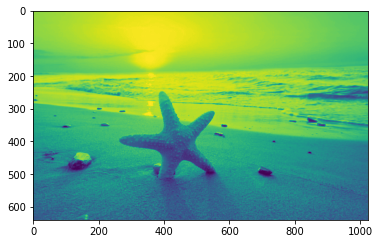

In [ ]:
plt.imshow(img)

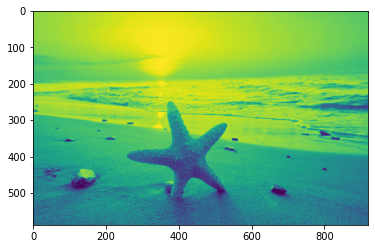

In [ ]:
plt.imshow(img_seam)